# 분석방법
- 1 축확인 의미확인
- 2 몰리고 희박한지 찾아라
- 3 왜그런지 비즈니스 이유 해석
- 4 추가 분석 대상을 찾아라

# 단변량분석_숫자형변수

<img src='https://github.com/DA4BAM/image/blob/main/%EB%8B%A8%EB%B3%80%EB%9F%89%EB%B6%84%EC%84%9D.png?raw=true' width=400/>

# 1.환경준비

## (1) 라이브러리 불러오기

In [67]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

## (2) 데이터 로딩

### 1) titanic
* url :  'https://raw.githubusercontent.com/DA4BAM/dataset/master/titanic_simple.csv'

**[titanic_simple 데이터 셋 정보]**

- PassengerId : 승객번호
- Survived : 생존여부(1:생존, 0:사망)
- Pclass : 객실등급(1:1등급, 2:2등급, 3:3등급)
- Name : 승객이름
- Sex : 성별(male, female)
- Age : 나이
- Fare : 운임($)
- Embarked : 승선지역(Southampton, Cherbourg, Queenstown)

In [68]:
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/titanic_simple.csv'
titanic = pd.read_csv(path)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,Southampton
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,Cherbourg
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,Southampton
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,Southampton
4,5,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,Southampton


### 2) New York Air Quality

* url : https://raw.githubusercontent.com/DA4BAM/dataset/master/air2.csv

**[airquality 데이터 셋 정보]**

- Ozone: 오존 농도  
- Solar.R: 태양복사량
- Wind: 풍속
- Temp: 기온
- Date : 연,월,일

In [69]:
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/air2.csv'
air = pd.read_csv(path)
air.head()

,Ozone,Solar.R,Wind,Temp,Date
0,41,190.0,7.4,67,1973-05-01
1,36,118.0,8.0,72,1973-05-02
2,12,149.0,12.6,74,1973-05-03
3,18,313.0,11.5,62,1973-05-04
4,19,NaN,14.3,56,1973-05-05


# 2.숫자형 변수

## (1) 수치화 : 대푯값

### 1) 평균(산술평균)

In [70]:
# 넘파이 함수 이용하기- 넘파이 어레이로 변화시켜서 계산. 시리즈, 리스트 가능
np.mean(titanic['Fare'])

32.2042079685746

In [71]:
# 판다스의 mean 메서드 이용하기- 시리즈에 딸려 있는 메소드
titanic['Fare'].mean()

32.2042079685746

### 2) 중앙값(중위수, median)  

자료의 순서상 가운데 위치한 값

In [72]:
# 넘파이 함수 이용하기
np.median(titanic['Fare'])

14.4542

In [73]:
# 판다스의 median 메서드 이용하기
titanic['Fare'].median()

14.4542

### 3) 최빈값

* 자료 중에서 가장 빈번하게 나타나는 값(빈도가 높은 값)
* 이산형 데이터(셀 수 있는 데이터)

In [74]:
# 판다스 메서드 이용하기
titanic['Pclass'].mode()

0    3
dtype: int64

In [102]:
tall = list(map(int, input().split()))
tall

 1 2 3


[1, 2, 3]

### 4) 4분위수

![](https://mblogthumb-phinf.pstatic.net/20150702_229/jevida_1435803723327eyeeG_PNG/3.png?type=w2)

In [103]:
titanic['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

<img src='https://raw.githubusercontent.com/jangrae/img/master/practice_01.png' width=120 align="left"/>

연습문제를 풀어 봅시다.

In [105]:
# titanic의 Age에 대해서 다음을 각각 확인해 봅시다.

titanic['Age'].describe()
# titanic['Age'].mode()


count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [106]:
# air의 Ozone에 대해서 다음을 각각 확인해 봅시다.

# 평균
air['Ozone'].mean()

# 최빈값
air['Ozone'].mode()

# 중앙값
air['Ozone'].median()

# 4분위수
air['Ozone'].describe()

count    153.000000
mean      42.052288
std       30.156127
min        1.000000
25%       20.000000
50%       34.000000
75%       59.000000
max      168.000000
Name: Ozone, dtype: float64

## (2) 수치화 : 기초통계량

### 1) 시리즈.describe()

In [107]:
titanic['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

### 2) 데이터프레임.describe()

In [108]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,Southampton
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,Cherbourg
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,Southampton
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,Southampton
4,5,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,Southampton


In [109]:
# 데이터프레임의 숫자타입 변수들 기초통계량 조회
titanic.describe()

,PassengerId,Survived,Pclass,Age,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,32.204208
std,257.353842,0.486592,0.836071,14.526497,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,512.329200


In [110]:
# 데이터프레임의 전체 변수들 기초통계량 조회
titanic.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,Southampton
freq,NaN,NaN,NaN,1,577,NaN,NaN,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,32.204208,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,49.693429,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,7.910400,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,14.454200,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,31.000000,NaN


## (3) 시각화

### 1) 히스토그램

* 히스토그램 기본

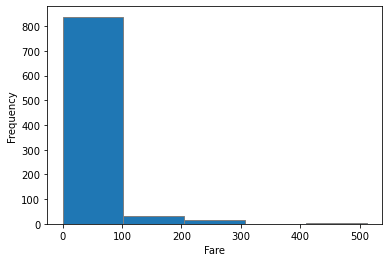

In [83]:
plt.hist(titanic.Fare, bins = 5, edgecolor = 'gray') #titanic[Fare] 가능
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

* 구간의 갯수를 조정해 봅시다.

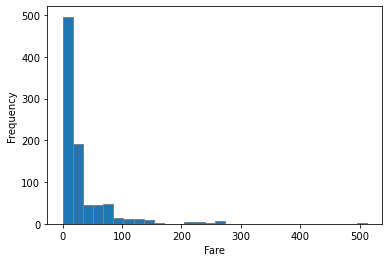

In [84]:
plt.hist(titanic.Fare, bins = 30, edgecolor = 'gray')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

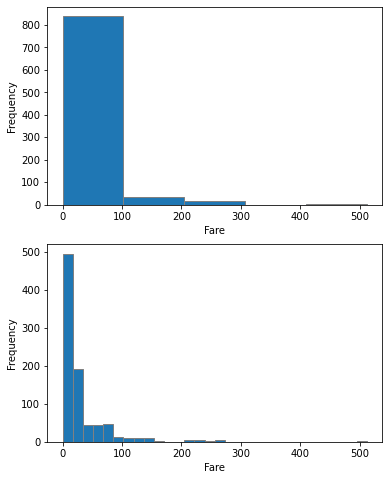

In [85]:
plt.figure(figsize=(6,8))
plt.subplot(2,1,1)
plt.hist(titanic.Fare, bins = 5, edgecolor = 'gray')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.subplot(2,1,2)
plt.hist(titanic.Fare, bins = 30, edgecolor = 'gray')
plt.xlabel('Fare')
plt.ylabel('Frequency')

plt.show()

* sns.histplot

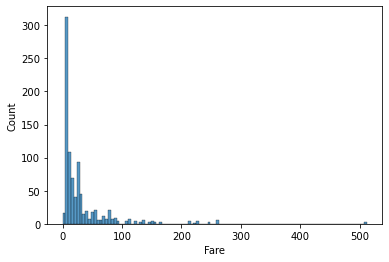

In [86]:
sns.histplot(x= 'Fare', data = titanic)  # 이름 알아서 채워줌
plt.show()

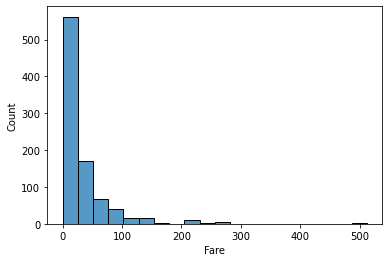

In [87]:
sns.histplot(x= 'Fare', data = titanic, bins = 20)
plt.show()

<img src='https://raw.githubusercontent.com/jangrae/img/master/practice_01.png' width=120 align="left"/>

[문제1] titanic의 Age에 칼럼에 대해 히스토그램을 그려 봅시다.
* bins = 8, 16, 32, 64

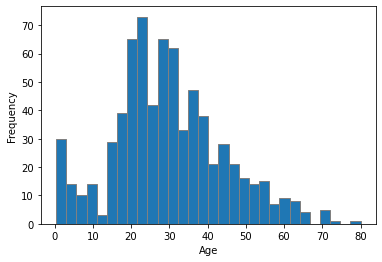

In [88]:

plt.hist(titanic.Age, bins = 30, edgecolor = 'gray')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

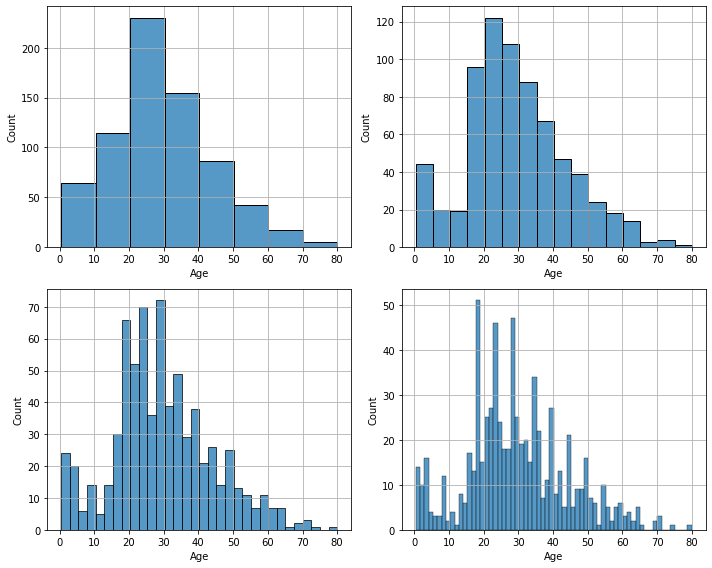

In [89]:
plt.figure(figsize=(10,8))

plt.subplot(2,2,1)
sns.histplot(x= 'Age', data = titanic, bins = 8)
plt.grid()

plt.subplot(2,2,2)
sns.histplot(x= 'Age', data = titanic, bins = 16)
plt.grid()

plt.subplot(2,2,3)
sns.histplot(x= 'Age', data = titanic, bins = 32)
plt.grid()

plt.subplot(2,2,4)
sns.histplot(x= 'Age', data = titanic, bins = 64)
plt.grid()

plt.tight_layout()
plt.show()

### 2) 밀도함수 그래프(kde plot)

* 히스토그램의 단점
    * 구간(bin)의 너비를 어떻게 잡는지에 따라 전혀 다른 모양이 될 수 있음

* 밀도함수 그래프
    * 막대의 너비를 가정하지 않고 모든 점에서 데이터의 밀도를 추정하는 커널 밀도 추정(Kernel Density Estimation)방식을 사용하여 이러한 단점을 해결.
    * 밀도함수 그래프 아래 면적은 1

* 밀도함수 그래프 그리기

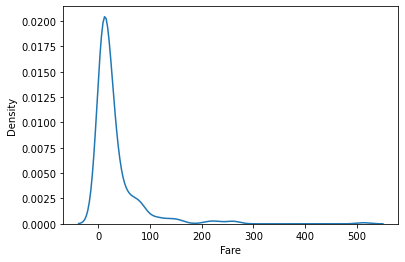

In [90]:
sns.kdeplot(titanic['Fare'])
# sns.kdeplot(x='Fare', data = titanic)

plt.show()

* 밀도 추정
    * 측정된(관측된) 데이터로부터 전체 데이터 분포의 특성을 추정
    * 예를 들어… OO역 사거리 일일 교통량을 측정한다고 해 봅시다.
        * 어제는 1200대 차량이 통과했고, 오늘은 1420대, 내일은, 모레는…
        * 이렇게 3개월간 매일 측정했다고 할 때,
        * 우리는 약 90일치의 데이터를 가지고 일일 교통량 분포를 히스토그램으로 그려볼 수 있습니다.
        * 그리고 나서 특정한 날의 교통량이 얼마나 될지 확률로 나타냄.



<img src='https://github.com/DA4BAM/image/blob/main/%EB%B0%80%EB%8F%84%EC%B6%94%EC%A0%95.png?raw=true' width=800/>

<img src='https://raw.githubusercontent.com/jangrae/img/master/practice_01.png' width=120 align="left"/>

[문1] titanic Age에 대해서 밀도함수 그래프를 그려봅시다.  

히스토그램과 어떤 차이가 있나요?

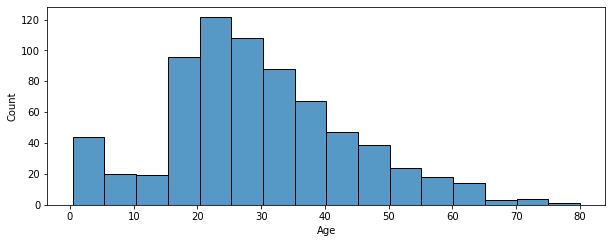

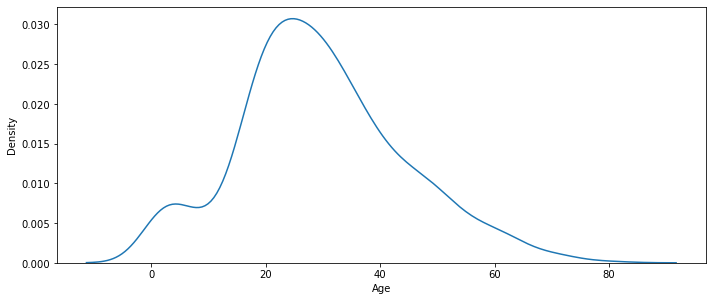

In [91]:
plt.figure(figsize=(10,8))

plt.subplot(2,1,1)
sns.histplot(titanic['Age'], bins=16)
plt.show()

plt.figure(figsize=(10,8))
plt.subplot(2,1,2)
sns.kdeplot(titanic['Age'])

plt.tight_layout()
plt.show()

[문2] titanic Age에 대해서 히스토그램을 그려봅시다.
* 단, 이번에는 sns.histplot 을 이용합니다.
* 옵션으로 kde = True 를 지정해 봅시다.

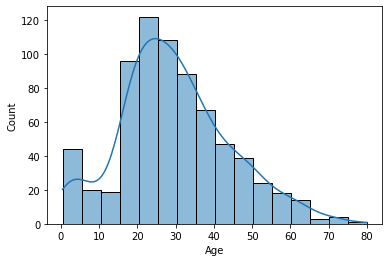

In [92]:
sns.histplot(titanic['Age'], bins=16, kde=True)
plt.show()

In [93]:
#//////////////////////////////////////////////

### 3) boxplot

**주의사항** : 값에 **NaN**이 있으면 그래프가 그려지지 않습니다.

## 박스플럿
* IQR = 1~3사분면
- acutal whisker length : 1.5xIQR 범위내 최소,최대값으로 결정
- ptential whisker length : 1.5xIQR 범위, 잠재적 수염길이범위
- ptential whisker lengt 넘어가는값 => 이상치

* boxplot 기본

In [94]:
# titanic['Age']에는 NaN이 있습니다. 이를 제외한 데이터
temp = titanic.loc[titanic['Age'].notnull()]

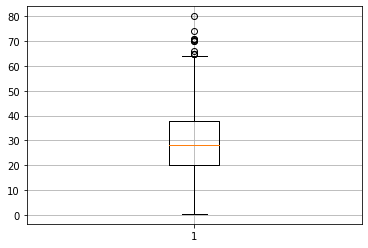

In [95]:
plt.boxplot(temp['Age'])
plt.grid()
plt.show()

* 옆으로 그리기

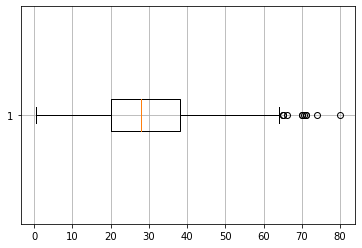

In [96]:
plt.boxplot(temp['Age'], vert = False)
plt.grid()
plt.show()

* sns.boxplot
    * seaborn 패키지 함수들은 NaN을 알아서 빼줍니다.

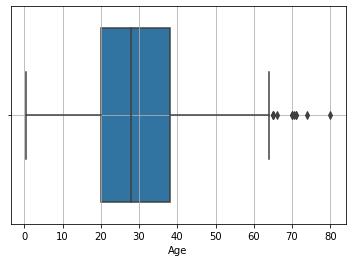

In [97]:
sns.boxplot(x = titanic['Age'])
plt.grid()
plt.show()

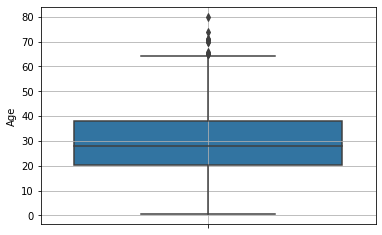

In [98]:
sns.boxplot(y = titanic['Age'])
plt.grid()
plt.show()

<img src='https://raw.githubusercontent.com/jangrae/img/master/practice_01.png' width=120 align="left"/>

[문1] titanic의 Age와 Fare에 대해서 각각 박스 플롯을 그리고 해석해 봅시다.

In [99]:
titanic[['Fare']].describe().T

,count,mean,std,min,25%,50%,75%,max
Fare,891.0,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292


In [100]:
titanic[['Age']].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,714.0,29.699118,14.526497,0.42,20.125,28.0,38.0,80.0


In [101]:
titanic['Age'].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64

In [113]:
titanic['Age'].isna().sum()

177

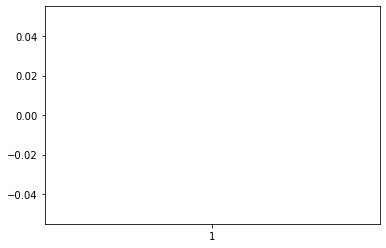

In [112]:
plt.boxplot(titanic['Age']) # null 있으면 안그려짐
plt.show()

C:\Users\wl\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


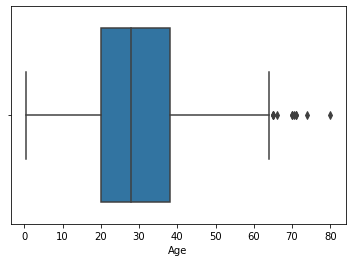

In [47]:
sns.boxplot(titanic['Age']) # 널 있어도 알아서 그려줌
plt.show()

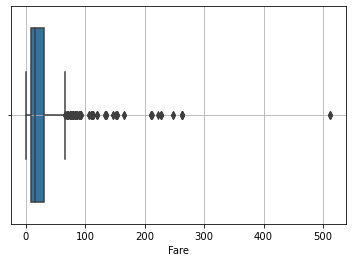

In [58]:
# sns.boxplot(titanic['Fare'])
# plt.show()

sns.boxplot(x='Fare', data=titanic)
plt.grid()
plt.show()

- 75프로 구간에 거의 다 몰려있다
- 나머지 25프로 구간

# 3.복습문제

## (1) 환경준비
* 라이브러리 불러오기

In [54]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

* 보스톤 집값 데이터를 이용하여 다음의 복습문제를 풀어 봅시다.

**변수설명**
> * medv  : 1978 보스턴 주택 가격, 506개 타운의 주택 가격 중앙값 (단위 1,000 달러) <== Target
* crim	범죄율
* zn	대저택비율 / 25,000 평방피트를 초과 거주지역 비율
* indus	비소매상업지역 면적 비율
* chas	찰스강변 위치(범주 : 강변1, 아니면 0)
* nox	일산화질소 농도
* rm	주택전체의 방 수
* age	1940년 이전에 건축된 주택의 비율
* dis	직업센터의 거리
* rad	방사형 고속도로까지의 거리
* tax	재산세율
* ptratio	학생/교사 비율
* lstat	인구 중 하위 계층 비율


- 행 : 타운(동)별 정보

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
# 보스톤 집값 데이터
boston = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/boston.csv')
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


## (2) 단변량 분석

* 단변량 분석 코드를 함수로 만들기(중요!)
    * 복잡하고 반복적인 코드를 함수로 만들어서 사용해 봅시다.

In [61]:
def eda_1_n(data, var, bins = 30) :
    # 기초 통계량
    display(data[[var]].describe().T)
    print()
    
    # 시각화
    plt.figure(figsize = (10,6))
    plt.subplot(2,1,1)
    sns.histplot(data[var], bins = bins, kde = True)
    plt.grid()

    plt.subplot(2,1,2)
    sns.boxplot(x = data[var])
    plt.grid()
    
    plt.tight_layout()
    plt.show()

* medv(집값)

,count,mean,std,min,25%,50%,75%,max
medv,506.0,22.532806,9.197104,5.0,17.025,21.2,25.0,50.0


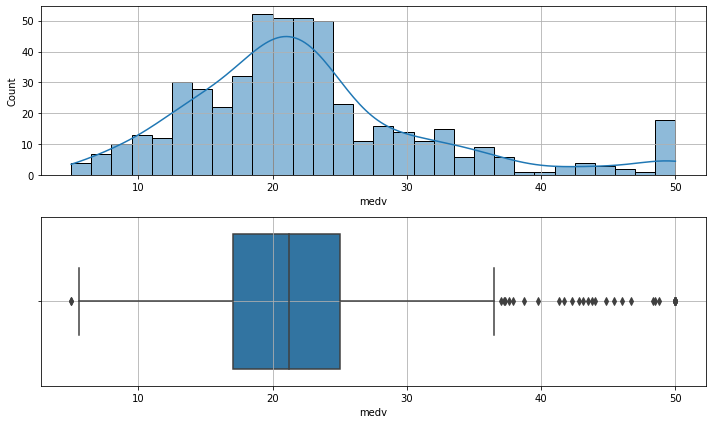

In [62]:
eda_1_n(boston, 'medv')

                     |    |   |  #1~3 사분위수, 50%

* crim(범죄율)

,count,mean,std,min,25%,50%,75%,max
crim,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762


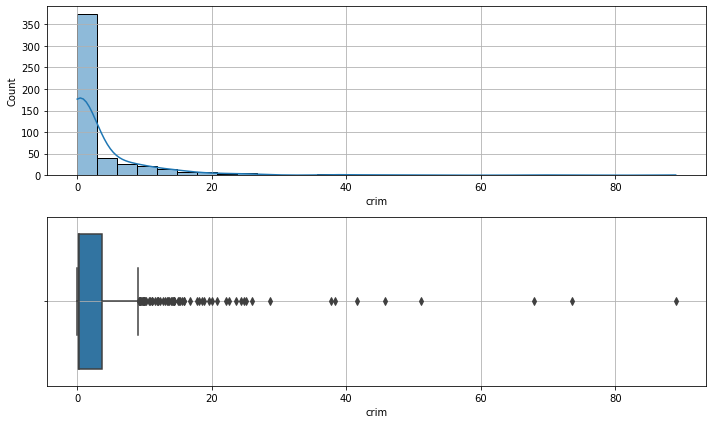

In [63]:
eda_1_n(boston, 'crim')

* lstat(하위계층 비율)

,count,mean,std,min,25%,50%,75%,max
lstat,506.0,12.653063,7.141062,1.73,6.95,11.36,16.955,37.97


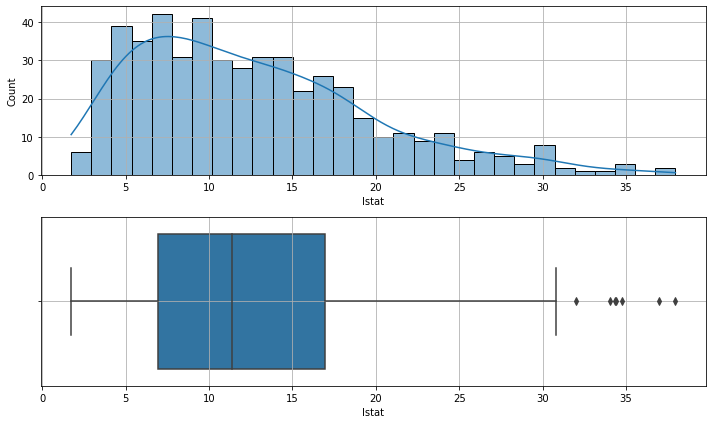

In [64]:
eda_1_n(boston, 'lstat')

* ptratio(교사1명당 학생수)

,count,mean,std,min,25%,50%,75%,max
ptratio,506.0,18.455534,2.164946,12.6,17.4,19.05,20.2,22.0


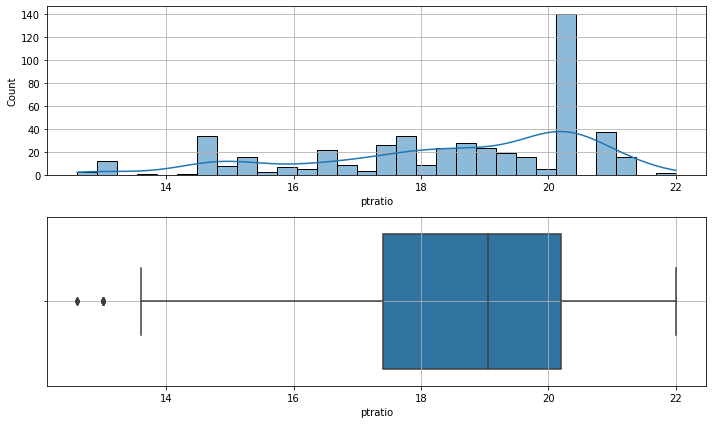

In [65]:
eda_1_n(boston, 'ptratio')

* tax(재산세)

,count,mean,std,min,25%,50%,75%,max
tax,506.0,408.237154,168.537116,187.0,279.0,330.0,666.0,711.0


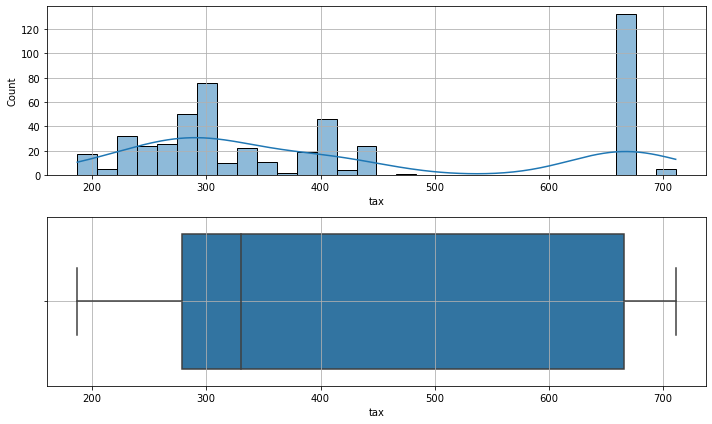

In [66]:
eda_1_n(boston, 'tax')